Asif kamran
8789001269
asifkam30@gmail.com

# Credit_Card_Customers-Machine_learning

In [1]:
#importing tools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_train= pd.read_csv("train_s3TEQDk.csv")
df_test=pd.read_csv("test_mSzZ8RL.csv")

In [3]:
df_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
df_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [5]:
df_train.shape

(245725, 11)

In [6]:
df_test.shape

(105312, 10)

# Check Numeric and Categorical Features

In [7]:
print(df_train.dtypes)

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object


In [8]:
#categorical features
categorical = df_train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= df_train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 4


# Check Missing Data

In [9]:
df_train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [10]:
df_test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [11]:
features_with_na=[features for features in df_train.columns if df_train[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(df_train[feature].isnull().mean(),4), '%missing values')

Credit_Product 0.1193 %missing values


In [12]:
features_with_na=[features for features in df_test.columns if df_test[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(df_test[feature].isnull().mean(),4), '%missing values')

Credit_Product 0.1189 %missing values


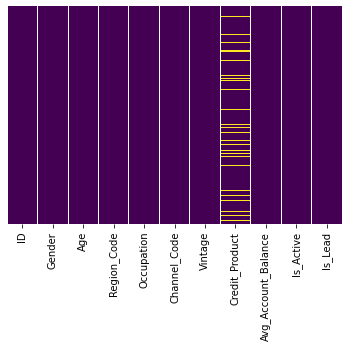

In [13]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis') # to visualise missing data using heatmap

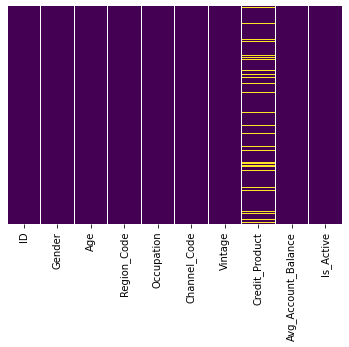

In [14]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis') # to visualise missing data using heatmap

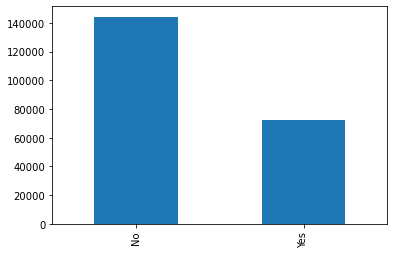

In [15]:
df_train['Credit_Product'].value_counts().plot.bar()

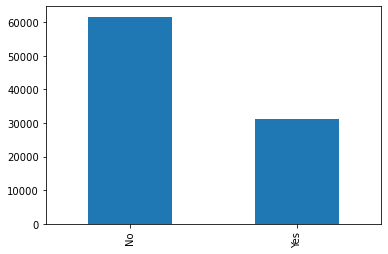

In [16]:
df_test['Credit_Product'].value_counts().plot.bar()

predicted missing value later on

# EDA

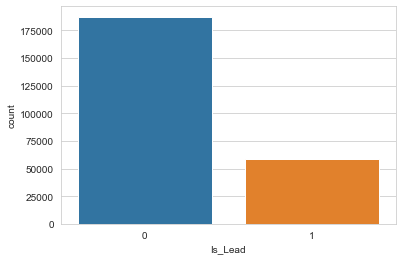

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Is_Lead',data=df_train)

it shows imbalance Dataset which will be upsampled later

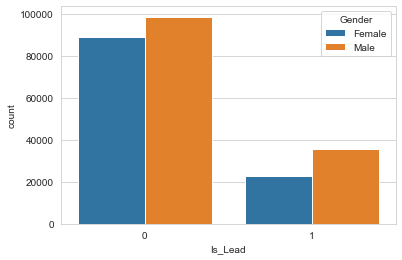

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Is_Lead',hue='Gender',data=df_train)

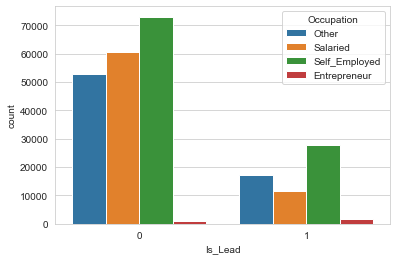

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Is_Lead',hue='Occupation',data=df_train)

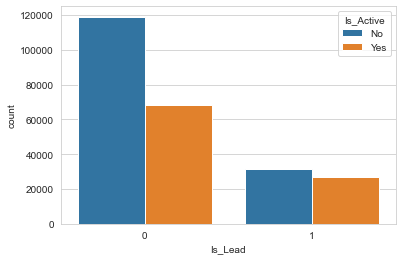

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Is_Lead',hue='Is_Active',data=df_train)

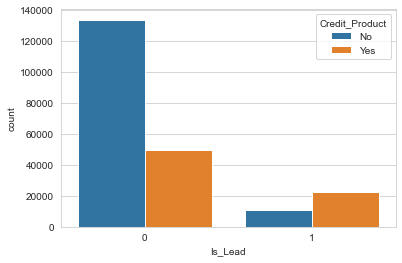

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Is_Lead',hue='Credit_Product',data=df_train)

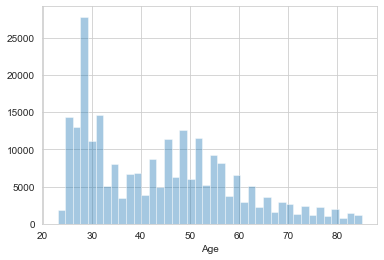

In [22]:
sns.distplot(df_train['Age'],kde=False,bins=40)

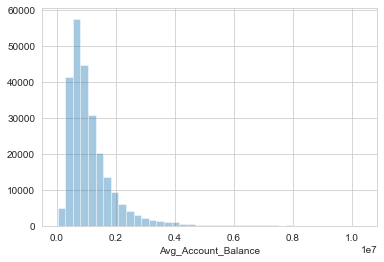

In [23]:
sns.distplot(df_train['Avg_Account_Balance'],kde=False,bins=40)

In [24]:
len(df_train['Region_Code'].unique())

35

In [25]:
df_train['Region_Code'].value_counts().to_dict() #capturing this in a dictionary that we will use to re map the labels

{'RG268': 35934,
 'RG283': 29416,
 'RG254': 26840,
 'RG284': 19320,
 'RG277': 12826,
 'RG280': 12775,
 'RG269': 7863,
 'RG270': 7720,
 'RG261': 7633,
 'RG257': 6101,
 'RG251': 5950,
 'RG282': 5829,
 'RG274': 5286,
 'RG272': 5252,
 'RG281': 5093,
 'RG273': 4497,
 'RG252': 4286,
 'RG279': 3976,
 'RG263': 3687,
 'RG275': 3245,
 'RG260': 3110,
 'RG256': 2847,
 'RG264': 2793,
 'RG276': 2764,
 'RG259': 2586,
 'RG250': 2496,
 'RG255': 2018,
 'RG258': 1951,
 'RG253': 1858,
 'RG278': 1822,
 'RG262': 1788,
 'RG266': 1578,
 'RG265': 1546,
 'RG271': 1542,
 'RG267': 1497}

In [26]:
#replacing each label in 'Region code' by its count
#a dictionary that maps each label to the counts
df_region=df_train['Region_Code'].value_counts().to_dict()

In [27]:
df_train.Region_Code=df_train.Region_Code.map(df_region)
df_test.Region_Code=df_test.Region_Code.map(df_region)

In [28]:
df_train['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [29]:
df_train['Occupation'].unique()

array(['Other', 'Salaried', 'Self_Employed', 'Entrepreneur'], dtype=object)

In [30]:
df_train['Channel_Code'].unique()

array(['X3', 'X1', 'X2', 'X4'], dtype=object)

In [31]:
df_train['Is_Active'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
df_train=pd.get_dummies(df_train,columns=['Gender','Occupation','Channel_Code','Is_Active'],drop_first=True)
df_test=pd.get_dummies(df_test,columns=['Gender','Occupation','Channel_Code','Is_Active'],drop_first=True)

In [33]:
df_train=df_train.drop('ID',axis=1)
df_test=df_test.drop('ID',axis=1)

In [34]:
df_train.head()

,Age,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Is_Active_Yes
0,73,35934,43,No,1045696,0,0,1,0,0,0,1,0,0
1,30,12826,32,No,581988,0,0,0,1,0,0,0,0,0
2,56,35934,26,No,1484315,0,0,0,0,1,0,1,0,1
3,34,7720,19,No,470454,0,1,0,1,0,0,0,0,0
4,30,5829,33,No,886787,0,0,0,1,0,0,0,0,0


In [35]:
df_test.head()

,Age,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Is_Active_Yes
0,29,26840,25,Yes,742366,1,1,0,0,0,0,0,0
1,43,35934,49,NaN,925537,1,1,0,0,1,0,0,0
2,31,7720,14,No,215949,1,0,1,0,0,0,0,0
3,29,5252,33,No,868070,1,1,0,0,0,0,0,0
4,29,7720,19,No,657087,0,1,0,0,0,0,0,0


In [36]:
df_train.shape

(245725, 14)

In [37]:
df_test.shape

(105312, 13)

## Predicting the Missing Values

In [38]:
#Data encoding
df_train['Credit_Product'] = df_train['Credit_Product'].map({'Yes':1,'No':0})


In [39]:
print(df_train.dtypes)

Age                           int64
Region_Code                   int64
Vintage                       int64
Credit_Product              float64
Avg_Account_Balance           int64
Is_Lead                       int64
Gender_Male                   uint8
Occupation_Other              uint8
Occupation_Salaried           uint8
Occupation_Self_Employed      uint8
Channel_Code_X2               uint8
Channel_Code_X3               uint8
Channel_Code_X4               uint8
Is_Active_Yes                 uint8
dtype: object


In [40]:
miss_train_df=df_train[df_train['Credit_Product'].isnull()]
print(miss_train_df.shape)


(29325, 14)


In [41]:
df_not_na=df_train.dropna()
print(df_not_na.shape)


(216400, 14)


In [42]:
X_miss_train=df_not_na.drop('Credit_Product',axis=1)
y_miss_train=df_not_na['Credit_Product']

X_miss_test=miss_train_df.drop('Credit_Product',axis=1)

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
miss_Model=GaussianNB()
miss_Model.fit(X_miss_train,y_miss_train)

GaussianNB()

In [45]:
miss_pred=miss_Model.predict(X_miss_test)
df_train.loc[df_train.Credit_Product.isnull(),'Credit_Product']= miss_pred

In [46]:
df_train.isnull().sum()

Age                         0
Region_Code                 0
Vintage                     0
Credit_Product              0
Avg_Account_Balance         0
Is_Lead                     0
Gender_Male                 0
Occupation_Other            0
Occupation_Salaried         0
Occupation_Self_Employed    0
Channel_Code_X2             0
Channel_Code_X3             0
Channel_Code_X4             0
Is_Active_Yes               0
dtype: int64

In [47]:
df_test['Credit_Product'] = df_test['Credit_Product'].map({'Yes':1,'No':0})
miss_test_df=df_test[df_test['Credit_Product'].isnull()]
df_not_na_t=df_test.dropna()
X_miss_train_t=df_not_na_t.drop('Credit_Product',axis=1)
y_miss_train_t=df_not_na_t['Credit_Product']

X_miss_test_t=miss_test_df.drop('Credit_Product',axis=1)
miss_Model_t=GaussianNB()
miss_Model_t.fit(X_miss_train_t,y_miss_train_t)
miss_pred_t=miss_Model_t.predict(X_miss_test_t)
df_test.loc[df_test.Credit_Product.isnull(),'Credit_Product']= miss_pred_t
df_test.isnull().sum()

Age                         0
Region_Code                 0
Vintage                     0
Credit_Product              0
Avg_Account_Balance         0
Gender_Male                 0
Occupation_Other            0
Occupation_Salaried         0
Occupation_Self_Employed    0
Channel_Code_X2             0
Channel_Code_X3             0
Channel_Code_X4             0
Is_Active_Yes               0
dtype: int64

In [48]:
df_train.head()

,Age,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Lead,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Is_Active_Yes
0,73,35934,43,0.0,1045696,0,0,1,0,0,0,1,0,0
1,30,12826,32,0.0,581988,0,0,0,1,0,0,0,0,0
2,56,35934,26,0.0,1484315,0,0,0,0,1,0,1,0,1
3,34,7720,19,0.0,470454,0,1,0,1,0,0,0,0,0
4,30,5829,33,0.0,886787,0,0,0,1,0,0,0,0,0


In [49]:
X_train=df_train.drop(['Is_Lead'],axis=1)
y_train=df_train['Is_Lead']
X_test=df_test


In [50]:
X_train.shape

(245725, 13)

In [51]:
X_test.shape

(105312, 13)

## Correlation

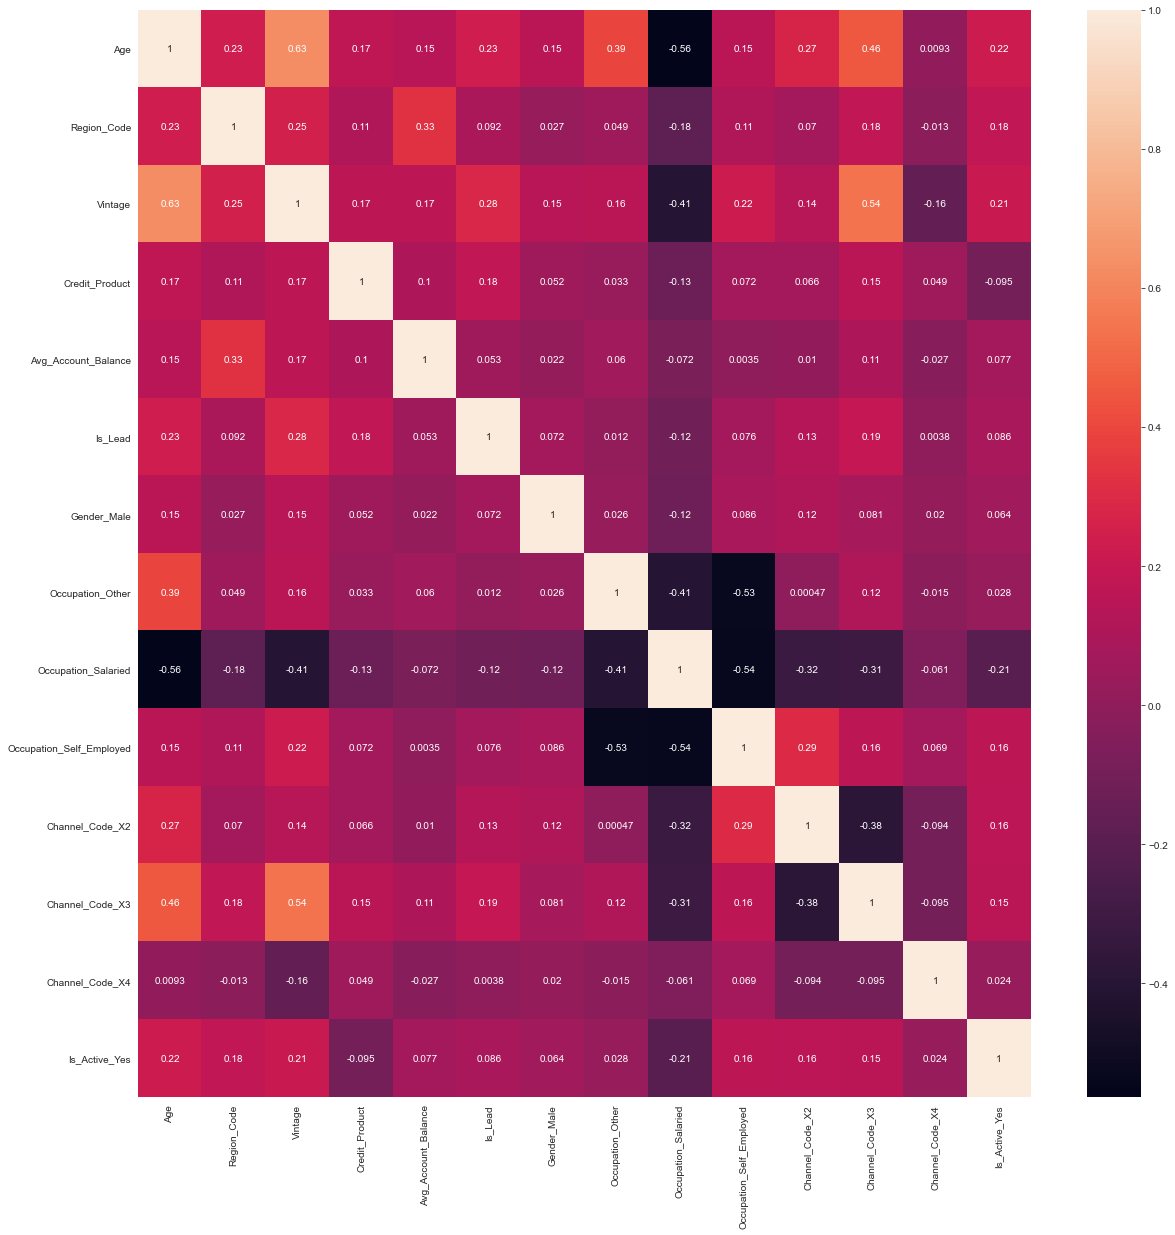

In [52]:
corr=df_train.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df_train[top_features].corr(),annot=True)

## StandardScaling

In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [54]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)


In [55]:
X_train_scaled.head()

,Age,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Is_Active_Yes
0,1.965365,1.565014,-0.122373,-0.677349,-0.096968,-1.096931,1.581677,-0.643770,-0.834589,-0.616835,1.605042,-0.15228,-0.796872
1,-0.934429,-0.312857,-0.462372,-0.677349,-0.640630,-1.096931,-0.632240,1.553349,-0.834589,-0.616835,-0.623037,-0.15228,-0.796872
2,0.818935,1.565014,-0.647825,-0.677349,0.417279,-1.096931,-0.632240,-0.643770,1.198194,-0.616835,1.605042,-0.15228,1.254906
3,-0.664680,-0.727795,-0.864188,-0.677349,-0.771395,0.911634,-0.632240,1.553349,-0.834589,-0.616835,-0.623037,-0.15228,-0.796872
4,-0.934429,-0.881468,-0.431463,-0.677349,-0.283276,-1.096931,-0.632240,1.553349,-0.834589,-0.616835,-0.623037,-0.15228,-0.796872


## Train_Test Split

In [56]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid = train_test_split(X_train_scaled,y_train,test_size=0.2,random_state=22)

# Up Sampling

In [57]:
interested=df_train[df_train['Is_Lead']==1]#only 23% of the total dataset
not_interested=df_train[df_train['Is_Lead']==0]
print(interested.shape,not_interested.shape)

(58288, 14) (187437, 14)


In [58]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler

In [59]:
smk=SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X_train,y_train)

In [60]:
X_res.shape,y_res.shape

((284816, 13), (284816,))

In [61]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 149979, 1: 46601})
Resampled dataset shape Counter({0: 142408, 1: 142408})


# Model Building

## Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
model_1=LogisticRegression()
model_1.fit(X_train, y_train)
pred_1= model_1.predict(X_valid)
from sklearn.metrics import classification_report
print(classification_report(y_valid,pred_1))


              precision    recall  f1-score   support

           0       0.79      0.97      0.87     37458
           1       0.62      0.17      0.27     11687

    accuracy                           0.78     49145
   macro avg       0.70      0.57      0.57     49145
weighted avg       0.75      0.78      0.73     49145



In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid,pred_1)

array([[36190,  1268],
       [ 9655,  2032]], dtype=int64)

## Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
model_2= RandomForestClassifier(n_estimators=300)
model_2.fit(X_train, y_train)
pred_2= model_2.predict(X_valid)
print(classification_report(y_valid,pred_2))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87     37458
           1       0.58      0.35      0.44     11687

    accuracy                           0.79     49145
   macro avg       0.70      0.64      0.65     49145
weighted avg       0.76      0.79      0.76     49145



In [65]:
confusion_matrix(y_valid,pred_2)

array([[34511,  2947],
       [ 7605,  4082]], dtype=int64)

# Naive_bayes

In [66]:
from sklearn.naive_bayes import GaussianNB

In [67]:
model_3=GaussianNB()
model_3.fit(X_train, y_train)

GaussianNB()

In [68]:
pred_3= model_3.predict(X_valid)
print(classification_report(y_valid,pred_3))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79     37458
           1       0.38      0.49      0.43     11687

    accuracy                           0.69     49145
   macro avg       0.60      0.62      0.61     49145
weighted avg       0.72      0.69      0.70     49145



# Submission

submission = pd.read_csv('sample_submission_eyYijxG.csv')
final_predictions = model_3.predict(X_test_scaled)
submission['Is_Lead'] = final_predictions
#only positive predictions for the target variable
submission['Is_Lead'] = submission['Is_Lead'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submis.csv', index=False)